# Moniosainen ryhmätyö – opettajan versio

### Sisällysluettelo

* [Ryhmä 1](#ryhma1)
    * [Osa 1: Ruoka-aineiden kuljetus](#osa1.1)
    * [Osa 2: Kuljetuksesta syntyvät päästöt](#osa1.2)
    * [Osa 3: Kaupunkien valinta](#osa1.3)
* [Ryhmät 2 ja 3](#ryhmat23)
    * [Osa 1: Tuotteen valinta ja kuljetuksen vaikutus](#osa2.1)
    * [Osa 2: Hiilidioksidipäästöjen jakautuminen](#osa2.2)
* [Ryhmä 4](#ryhma4)

Tämän ryhmätyön avulla voidaan havainnollistaa tieteellistä lähestymistapaa, missä useampi itsenäinen ryhmä kantaa oman kortensa kekoon kiinnostavien lopputulosten saavuttamiseksi. Tehtävän ideana on, että oppilaat jaetaan 3-5 ryhmään, joilla kaikilla on omat vastuualueensa ja aikataulunsa ryhmätyön suorittamisessa.

Ryhmätyössä ensimmäinen ryhmä valmistelee datan, johon muiden ryhmien tehtävänannot perustuvat. Mikäli joitain virheitä tulee, niin virheet siirtyvät luonnollisesti eteenpäin ryhmältä seuraavalla "rikkinäisen puhelimen" tapaan. Tämän lisäksi ryhmille on esitetty kysymyksiä, joihin heidän tulee vastata sanallisesti osana raporttia. Lopulta muodostetut kuvaajat sekä raportti lähetetään suoraan seuraavalle ryhmälle, joka kirjoittaa oman raporttinsa tähän pohjautuen. Viimeisen ryhmän tehtävänä on muodostaa yhteenvetoraportti, sekä esittää saadut lopputulokset muille oppilaille.

Jokainen ryhmä toimii itsenäisesti ryhmäkohtaisen aikataulunsa mukaan. Ryhmät voivat keksiä omalle tutkimusryhmälleen nimen, jonka lisäksi tulisi sopia myös siitä, miten heidän ryhmälle voidaan esittää tarvittaessa kysymyksiä. Tämä voidaan toteuttaa esimerkiksi viiden minuutin kysymystuokiolla tiettyjen oppituntien jälkeen, sähköpostitse jne. Ryhmiä myös kannustetaan esittämään ainakin yksi kysymys edeltävälle ryhmälle.

Tähän tiedostoon on koostettu jokaisen ryhmän tehtävät opettajaa varten. Erilliset ryhmäkohtaiset pohjat löytyvät <a href="https://github.com/opendata-education/Maantiede/tree/main/materiaali/harjoitukset">täältä</a>.

## Ryhmä 1 <a class="anchor" id="ryhma1"></a>

Ilmastonmuutokseen ja maatalouteen liittyvässä keskustelussa toistuu kysymys siitä, että onko ruoan alkuperällä merkitystä meidän ruokavalion aiheuttamiin päästöihin. Kuinka paljon päästöt eroavat esimerkiksi paikallisen naudanlihan ja Meksikosta kuljetetun avokadon välillä? Lähdetään tutkimaan asiaa!

Teidän tehtävänänne on selvittää, kuinka ruoan kuljettaminen jakautuu eri kuljetusmuotojen kesken – kuinka paljon ruokaa kuljetetaan keskimäärin ilmateitse, meriteitse, rautateitse ja autoteitse. Tähän tarvittava data löytyy tiedostosta "food_miles_by_method.csv". Lopputuloksena teidän tulee palauttaa raportti, joka sisältää tarvittavat kuvaajat, selityksen kuvaajien sisällöstä sekä vastaukset lopussa listattuihin kysymyksiin.

### Osa 1: Ruoka-aineiden kuljetus <a class="anchor" id="osa1.1"></a>

In [2]:
# Aloitetaan ensin lataamalla tarvittavat paketit, joita voidaan hyödyntää kuvaajien muodostamisessa.

import pandas as pd
import matplotlib.pyplot as plt
import csv

In [3]:
# Luetaan tiedosto, josta löytyy tarvittava data.

matkustustavat = pd.read_csv('https://raw.githubusercontent.com/opendata-education/Maantiede/main/materiaali/data/food_miles_by_method.csv')

In [4]:
# Ajamalla tämän solun, voit nähdä mitä dataa meidän tiedosto sisältääkään.

matkustustavat.head()

,Kulkuvayla,Vuosi,Osuus,Paastot
0,Ilma,2010,0.16,1.13
1,Rautatie,2010,9.90,0.05
2,Maantie,2010,30.97,0.20
3,Vesi,2010,58.97,0.10


Pysähdytään hetkeksi tähän ja tutkitaan saamaamme taulukkoa.

Taulukon sarakkeissa "Osuus" = Osuus ruoan kuljetuksesta (Poore & Nemecek 2018) ja
"Paastot" = Kuljetuksen päästöt ilman lämpötilan säätelyä (kgCO2eq per tonne-kilometer) (Poore & Nemecek 2018).

Mitä tietoja taulukosta löytyy? Mitä tarkoitetaan yksikössä esiintyvällä hiilidioksidiekvivalentilla ja tonni-kilometrillä? Entä kuljetuksella ilman lämpötilan säätelyä? Mistä nämä taulukon tiedot ovat peräisin? Tämän jälkeen voidaan muodostaa taulukon tiedoista sopiva kuvaaja.

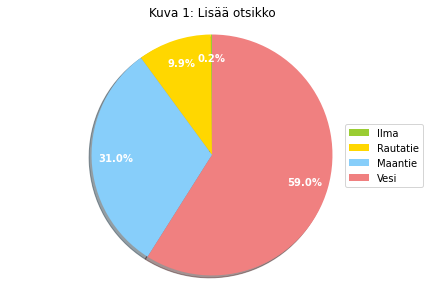

In [5]:
kulkuvaylat = matkustustavat['Kulkuvayla'] # Tallennetaan kulkuneuvot tiedostosta muuttujaan 'kulkuvaylat'
osuudet = matkustustavat['Osuus'] # Tallennetaan ruokakuljetusosuudet tiedostosta muuttujaan 'osuudet'

colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral'] # Valitaan osioiden värit. Voitte valita värit itse.

patches, texts, pcts = plt.pie(osuudet, colors=colors, autopct='%.1f%%', pctdistance=0.8, shadow=True, startangle=90)
plt.legend(patches, kulkuvaylat, bbox_to_anchor=(1,0.5), loc="center right", bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0, bottom=0.1, right=1)
plt.gca().axis("equal")
plt.setp(pcts, color='white', fontweight='bold')
plt.tight_layout()

plt.title ("Kuva 1: Lisää otsikko") # Lisätkää kuvaajalle sopiva otsikko, mitä tällä kuvaajalla kerrotaan?
plt.show()

### Osa 2: Kuljetuksesta syntyvät päästöt <a class="anchor" id="osa1.2"></a>

Muodostetaan myös kuvaaja eri kuljetusmuotojen päästöistä, jotta voidaan paremmin vertailla niitä keskenään.

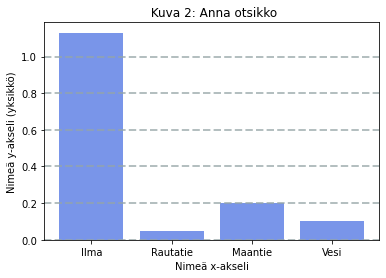

In [7]:
paastot = matkustustavat['Paastot']
# paastot.head()

plt.bar(kulkuvaylat, paastot, color='royalblue', alpha=0.7) # aikaisemman solun ansiosta 'labels' sisltää jo tiedon
# tarkasteltavista kulkuvälineistä

plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)

plt.xlabel('Nimeä x-akseli') # Nimeä y-akseli
plt.ylabel('Nimeä y-akseli (yksikkö)') # Nimeä x-akseli
plt.title(' Kuva 2: Anna otsikko') # Anna kuvaajalle sopiva otsikko
plt.show()

Mitä tekemänne kuvaajat kertovat? Mitä ajatuksia ne herättävät? Milloin tiettyjä kuljetusmuotoja voisi olla hyväksyttävää käyttää, milloin taas ei? Pitäisikö jostain kuljetusmuodosta luopua, vai löytyykö kaikille paikkansa?

### Osa 3: Kaupunkien valinta <a class="anchor" id="osa1.3"></a>

Valitkaa ryhmänne kesken kolme kaupunkia eri puolilta maapalloa, ja selvittäkää niiden etäisyys Helsinkiin.

In [8]:
# Tässä solussa annetaan halutut tiedot taulukkoa varten. Korvatkaa Kaupunki 1 teidän ensimmäisen kaupunkinne nimellä,
# ja sitä vastaavaan etäisyys-kohtaan etäisyys Helsinkiin. Muistakaa täydentää taulukon sulkeisiin (yksikkö)
# käyttämänne etäisyyden yksikkö.

# Lopullisen taulukon tiedot sijaitsevat tämän jälkeen listassa'tiedot1'.

tiedot1 = {'Kaupunki' : ['Kaupunki 1', 'Kaupunki 2', 'Kaupunki 3', ],  
        'Etäisyys Helsinkiin (yksikkö)' : ['etäisyys 1', 'etäisyys 2', 'etäisyys 3']}

taulukko1 = pd.DataFrame(tiedot1)
display(taulukko1) # Tulostetaan taulukko

,Kaupunki,Etäisyys Helsinkiin (yksikkö)
0,Kaupunki 1,etäisyys 1
1,Kaupunki 2,etäisyys 2
2,Kaupunki 3,etäisyys 3


Hienoa työtä! Nyt raporttiin tarvittavat kuvaajat ovat valmiit. Kirjoittakaa lopuksi raportti, johon sisällytätte

1. tekemänne kuvaajat ja niiden sanalliset selitykset sekä kuvatekstit
2. havainnot kuvaajista
3. vastaukset alla oleviin kysymyksiin
4. tieto siitä, miten teidän ryhmään voi ottaa yhteyttä jatkokysymyksiin liittyen

Raportti on erityisen tärkeää kirjoittaa niin, että jatkava ryhmä saa tarpeeksi tietoa selvittämistänne asioista, yksinkertaisesti ja kattavasti. Käykää raportti siis huolellisesti läpi niin, että mietitte mitä mahdollisia kysymyksiä jatkava ryhmä voisi keksiä teidän raportista, ja vastatkaa niihin kysymyksiin jo valmiiksi.

Kysymykset:
1. Mitä tarkoitetaan hiilidioksidiekvivalentilla ja tonni-kilometrillä?  Entä kuljetuksella ilman lämpötilan säätelyä?
2. Mistä taulukon tiedot ovat peräisin?
3. Miettikää, mitä tekemänne kuvaajat kertovat? Mitä ajatuksia ne herättävät? Milloin tiettyjä kuljetusmuotoja voisi olla hyväksyttävää käyttää, milloin taas ei? Pitäisikö jostain kuljetusmuodosta luopua, vai löytyykö kaikille paikkansa?
4. Taulukoiden luvut eri ruoan kuljetukseen käytettävien kulkuvälineiden aiheuttamille päästöille ovat keskiarvoja. Miettikää mitkä tekijät voivat vaikuttaa selvittämienne arvojen suuruuteen – missä tilanteissa luvut voisivat olla suurempia, missä tilanteessa pienempiä. Onko keskiarvojen käyttäminen perusteltua, missä tilanteissa on ja missä tilanteissa ei?
5. Miksi valitsitte nämä kolme kaupunkia lähempään tarkasteluun?

## Ryhmät 2 ja 3 <a class="anchor" id="ryhmat23"></a>

Ilmastonmuutokseen ja maatalouteen liittyvässä keskustelussa toistuu kysymys siitä, että onko ruoan alkuperällä merkitystä meidän ruokavalion aiheuttamiin päästöihin. Kuinka paljon päästöt eroavat esimerkiksi paikallisen naudanlihan ja Meksikosta kuljetetun avokadon välillä? Lähdetään tutkimaan asiaa!

Teidän tehtävänänne on tutustua ensimmäisen ryhmän tekemään raporttiin, josta saatte tarvitsemanne datan ja tiedon omien kuvaajienne tekemiseen. Tämän jälkeen tutustukaa teille annettuun tiedostoon 'food-emissions-supply-chain.csv', jossa on listattuna joitakin ruoka-aineita ja niistä syntyviä päästöjä.

Valitkaa yksi ruoka-aine (Ryhmä 2 - kasvis, Ryhmä 3 - liha), jota tarkastelette lähemmin vertailemalla eri kuljetusmuotojen vaikutusta tuotteen kokonaispäästöihin, kun 1 kg tuotetta kuljetetaan ensimmäisen ryhmän valitsemista kaupungeista Helsinkiin. Tämän lisäksi tarkastellaan vielä sitä, mistä ruoantuotannon vaiheista valitsemanne tuotteen hiilidioksidipäästöt koostuvat. Lopputuloksena teidän tulee palauttaa raportti, joka sisältää tarvittavat kuvaajat, selityksen kuvaajien sisällöstä sekä vastaukset alla listattuihin kysymyksiin.

### Osa 1: Tuotteen valinta ja kuljetuksen vaikutus <a class="anchor" id="osa2.1"></a>

In [10]:
# Oppilaiden versiossa ladataan ensin tarvittavat paketit käyttöön.
# Ladataan ensin annettu csv-tiedosto käytettäväksi 'ruoat'-nimiseen muuttujaan.

ruoat = pd.read_csv('https://raw.githubusercontent.com/opendata-education/Maantiede/main/materiaali/data/food-emissions-supply-chain.csv')

In [11]:
# Tämä solu mahdollistaa sen, että voidaan tulostaa tiedoston kaikki rivit tarkasteltavaksi.

pd.set_option("max_rows", None)
ruoat

,Ruoka-aine,Koodi,Vuosi,Paastot maankaytosta,Paastot maanviljelysta,Paastot elaimen ruoasta,Paastot ruoan prosessoinnista,Paastot kuljetuksesta,Paastot jakelusta,Paastot pakkauksesta
0,Omenat,NaN,2018,0.0,0.2,0.0,0.0,0.1,0.0,0.0
1,Banaanit,NaN,2018,0.0,0.3,0.0,0.1,0.3,0.0,0.1
2,Ohra,NaN,2018,0.0,0.2,0.0,0.1,0.0,0.3,0.5
3,Nauta (lihakarja),NaN,2018,16.3,39.4,1.9,1.3,0.3,0.2,0.2
4,Nauta (maitotuotteet),NaN,2018,0.9,15.7,2.5,1.1,0.4,0.2,0.3
5,Sokerijuurikkaan sokeri,NaN,2018,0.0,0.5,0.0,0.2,0.6,0.0,0.1
6,Marjat ja rypaleet,NaN,2018,0.0,0.7,0.0,0.0,0.2,0.0,0.2
7,Kaalit,NaN,2018,0.0,0.3,0.0,0.0,0.1,0.0,0.0
8,Ruokosokeri,NaN,2018,1.2,0.5,0.0,0.0,0.8,0.0,0.1
9,Maniokki,NaN,2018,0.6,0.2,0.0,0.0,0.1,0.0,0.0


Nyt kun olette saaneet taulukon sisällön itsellenne tarkasteltavaksi, on aika valita teitä kiinnostava ruoka-aine. Tämän jälkeen lasketaan tuotteen hiilidioksidipäästöt ilman kuljetuksen osuutta, jonka jälkeen voidaan laskea eri kuljetusmuotojen sekä kuljetettavan matkan vaikutus kokonaispäästöihin.

Taulukossa esitettyjen lukujen yksikkö on kgCo2eq.
Esimerkiksi jos tuotteen hiilidioksidipäästöt ilman kuljetusta on 5 kgCO$^2$eq (yhtä kilogrammaa kohden), kilogramma tuotetta kuljetetaan tuottajalta 50km matka junalla Helsinkiin, saadaan päästöiksi 5 kgCO$^2$eq  + 0.05 kgCO$^2$eq  * 50 km / 1000 kg = 5.0025 kgCO$^2$eq yhtä kilogrammaa kohden.

In [15]:
# Taulukkoa varten täydennetään lista, joka sisältää tarvittavat tiedot – valitsemanne ruoan, eri lähtökaupungit,
# kuljetettava matka sekä siihen liittyvät hiilijalanjäljet eri kuljetusmuodoilla. Voitte ajaa tämän solun ensin
# tekemättä muutoksia, jotta näette minkälaista taulukkoa alatte täyttämään.

# Taulukossa voitte halutessanne pitää sarakkeiden otsikot muodossa 'Hiilipäästöt 1' jne, mutta muistakaa
# sitten selvittää tekstissä, mitä kuljetusmuotoa mikäkin sarake vastaa.

tiedot = {'Ruoka' : ['x', 'x', 'x', 
                                    ],  
        'Lähtökaupunki' : ['Kaupunki 1', 'Kaupunki 2', 'Kaupunki 3'],  
        'Etäisyys Helsinkiin' : ['etäisyys', 'etäisyys', 'etäisyys'], 
        'Hiilipäästöt 1 (yksikkö)' : ['luku 1.1', 'luku 1.2', 'luku 1.3'],
        'Hiilipäästöt 2 (yksikkö)' : ['luku 2.1', 'luku 2.2', 'luku 2.3'],
        'Hiilipäästöt 3 (yksikkö)' : ['luku 3.1', 'luku 3.2', 'luku 3.3'],
        'Hiilipäästöt 4 (yksikkö)' : ['luku 4.1', 'luku 4.2', 'luku 4.3']}

taulukko = pd.DataFrame(tiedot)
display(taulukko)

,Ruoka,Lähtökaupunki,Etäisyys Helsinkiin,Hiilipäästöt 1 (yksikkö),Hiilipäästöt 2 (yksikkö),Hiilipäästöt 3 (yksikkö),Hiilipäästöt 4 (yksikkö)
0,x,Kaupunki 1,etäisyys,luku 1.1,luku 2.1,luku 3.1,luku 4.1
1,x,Kaupunki 2,etäisyys,luku 1.2,luku 2.2,luku 3.2,luku 4.2
2,x,Kaupunki 3,etäisyys,luku 1.3,luku 2.3,luku 3.3,luku 4.3


Huomatkaa, että alkuperäisessä taulukossa kuljetuksen aiheuttamat päästöt on laskettu yhtä kilogrammaa kohden, ei tuhatta kilogrammaa. Miksi? Milloin on järkevämpää ilmoittaa päästöt kilogrammaa kohden, milloin tuhatta kilogrammaa kohden? Miksi eri ruoka-aineiden kuljetus aiheuttaa erisuuruiset päästöt?

Tässä päästöjä verrataan kilogrammoja kohden, mitä muita suureita kohden niitä voitaisiin mitata?

Miettikää, miten laskemanne kuljetuksen hiilidioksidipäästöt poikkeavat taulukossa annetusta arvosta? Vastaako joku laskemanne tulos annettua kokonaishiilidioksidipäästöä? Millä kulkuvälineellä kyseinen ruoka todennäköisesti kuljetetaan? Miksi? Onko kuljetuksen osuus tärkeää ottaa huomioon jonkin tietyn ruoan päästöjä tarkasteltaessa?

### Osa 2: Hiilidioksidipäästöjen jakautuminen <a class="anchor" id="osa2.2"></a>

Tarkastellaan myös vertailun vuoksi alkuperäisen tiedoston mukaisia kokonaispäästöjä valitsemanne ruoka-aineen osalta.

In [13]:
# Tässä solussa luodaan tarvittavat listat siihen, että voidaan näyttää mistä valitsemanne
# ruoka-aineen hiilidioksidipäästöt koostuvat.

osiot  = ruoat.columns # Tallennetaan 'osiot'-muuttujaan 'food-emissions-supply-chain.csv'-tiedoston sarakkeiden nimet
osiot = osiot[3:9] # Valitaan hakasulkeisiin ne sarakkeet, jotka halutaan ottaa käyttöön.
# Esimerkiksi 3 = päästöt maankäytöstä jne.
print(osiot) # Tarkistetaan tulostamalla valittu lista, että ollaanhan varmasti valittu oikeat sarakkeet.

arvot = ruoat.loc[1] # Tallennetaan 'arvot'-muuttujaan valitun ruoka-aineen tiedot.
# Yllä olevaan hakasulkeisiin tulee teidän valitsemanne ruoka-aineen numero, esimerkiksi omenat = 0, banaanit = 1. 

arvot = arvot[3:9] # Valitaan hakasulkeisiin ne sarakkeet, jotka halutaan ottaa käyttöön
print(arvot) # Tarkistetaan tulostamalla valittu lista, että ollaanhan valittu oikeat sarakkeet

# Huomaa, että sijoittamalla esimerkiksi print(arvot[0]) saat tulostettua maankäytön osuuden päästöistä, eli
# Ensimmäinen termi on paikalla 0, toinen termi paikalla 1 jne.

summa = sum(arvot) # Lasketaan kaikkien sarakkeiden summa jatkokäyttöä varten.

kok_osuus = [i / summa for i in arvot] # Lasketaan jokaisen osion osuus kokonaishiilijalanjäljestä.

# Halutessanne voitte poistaa ne sarakkeet, joiden osuus kokonaishiilidioksidipäästöihin on nolla.
# Mikäli poistatte joitain sarakkeita, niin muistakaa kuitenkin mainita raportissanne mitkä osiot olette poistaneet,
# koska ne eivät kasvata tuotteen hiilidioksidipäästöjä.

print(kok_osuus) # Tulostetaan tiedostosta laskettu kokonaishiilidioksidipäästöt.


Index(['Paastot maankaytosta', 'Paastot maanviljelysta',
       'Paastot elaimen ruoasta', 'Paastot ruoan prosessoinnista',
       'Paastot kuljetuksesta', 'Paastot jakelusta'],
      dtype='object')
Paastot maankaytosta               0
Paastot maanviljelysta           0.3
Paastot elaimen ruoasta            0
Paastot ruoan prosessoinnista    0.1
Paastot kuljetuksesta            0.3
Paastot jakelusta                  0
Name: 1, dtype: object
[0.0, 0.4285714285714286, 0.0, 0.14285714285714288, 0.4285714285714286, 0.0]


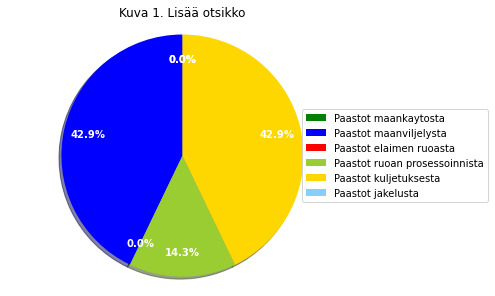

In [14]:
# Muodostetaan haluttu kuvaaja, jossa tarkastellaan eri osioiden osuutta tuotteen kokonaispäästöihin

labels = osiot
sizes = kok_osuus

colors = ['green','blue','red','yellowgreen', 'gold', 'lightskyblue', 'lightcoral'] # Valitaan värit
# Voitte valita haluamanne värit sijoittamalla.

patches, texts, pcts = plt.pie(sizes, colors=colors, autopct='%.1f%%', pctdistance=0.8, shadow=True, startangle=90)
plt.legend(patches, labels, bbox_to_anchor=(1.15,0.5), loc="center right", bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0, bottom=0.1, right=1)
plt.gca().axis("equal")
plt.setp(pcts, color='white', fontweight='bold')
plt.tight_layout()

plt.title ("Kuva 1. Lisää otsikko") # Lisätkää kuvaajalle sopiva otsikko, mitä tällä kuvaajalla kerrotaan?

plt.show()

Hienoa työtä! Nyt raporttiin tarvittavat kuvaajat ovat valmiit. Kirjoittakaa lopuksi raportti, johon sisällytätte

1. tekemänne kuvaajat ja taulukot, niiden sanalliset selitykset sekä kuvatekstit
2. havainnot kuvaajista, mitä ajatuksia ne herättävät?
3. vastaukset alla oleviin kysymyksiin
4. tieto siitä, miten teidän ryhmään voi ottaa yhteyttä jatkokysymyksiin liittyen

Raportti on erityisen tärkeää kirjoittaa niin, että jatkava ryhmä saa tarpeeksi tietoa selvittämistänne asioista, yksinkertaisesti ja kattavasti. Käykää raportti siis huolellisesti läpi niin, että mietitte mitä mahdollisiä kysymyksiä jatkava ryhmä voisi keksiä teidän raportista, ja vastatkaa niihin kysymyksiin jo valmiiksi.

Kysymykset:
1. Mistä taulukoiden ja kuvaajien tiedot ovat peräisin?
3. Miettikää, mitä tekemänne kuvaajat/taulukot kertovat? Mitä ajatuksia ne herättävät? 
4. Entäs teidän valitsemanne tuote? Osuiko jollain kuljetusmuodolla laskettu päästöarvio lähelle taulukosta löytyvää arvoa? Onko kuljetusväylän valinnalla merkitystä tuotteen kokonaispäästöihin, ja jos on, niin kuinka merkittävästi? Kuinka iso vaikutus on tuotteen alkuperämaalla? Mistä tuotantovaiheista tuotteen päästöt koostuvat?
5. Arvioikaa tekemienne laskujen luotettavuutta - vaikuttaako joku tuloksista virheelliseltä? Onko saamanne tulokset perusteltavissa?
6. Milloin on järkevämpää ilmoittaa päästöt kilogrammaa kohden, milloin tuhatta kilogrammaa kohden? Miksi eri ruoka-aineiden kuljetus aiheuttaa erisuuruiset päästöt?

## Ryhmä 4 <a class="anchor" id="ryhma4"></a>

Ilmastonmuutokseen ja maatalouteen liittyvässä keskustelussa toistuu kysymys siitä, että onko ruoan alkuperällä merkitystä meidän ruokavalion aiheuttamiin päästöihin. Kuinka paljon päästöt eroavat esimerkiksi paikallisen naudanlihan ja Meksikosta kuljetetun avokadon välillä? Lähdetään tutkimaan asiaa!

Teidän ryhmän tarkoituksena on perehtyä aikaisempien ryhmien kirjoittamiin raportteihin ja koostaa näistä yhteinen kokonaisuus esitettäväksi. Hyödyntäkää aikaisempia ryhmiä esittämällä tarkentavia kysymyksiä. Jos onnistutte löytämään kysymyksiä mihin ette löydä vastauksia, jättäkää ne teidän esitykseen. On mahtavaa esittää pohdiskelevia kysymyksiä oman esityksen aikana!

Esityksessä tulisi käydä ilmi ainakin seuraavat asiat:
1. Kulkuvälineisiin liittyvä data, niiden päästöjen ja siihen vaikuttavien asioiden vertailu keskenään. Mistä nämä erot voivat johtua? Onko joillakin kulkuvälineillä etuja, mitä muilla kulkuvälineillä ei ole? Kuinka paljon mitäkin kulkuvälinettä käytetään?
2. Selittäkää läpi esiintyvät yksiköt ja kuvaajat.
3. Vertailkaa näitä kahta valittua ruoka-ainetta keskenään. Mitä ajatuksia tästä herää? Onko vaikutusta sillä, onko tuote tuotettu lähellä vai kaukana? Mitä kuljetusväylää pitkin tuotteet todennäköisesti kuljetetaan? Miksi? Mistä osioista tuotteiden hiilipäästöt koostuvat? Onko näillä tuotteilla erisuuret päästöt, ja mistä nämä erot syntyvät?
4. Onko laskujen lopputulokset loogisia ja perusteltavissa? Vaikuttaako raporttien lopputulokset luotettavilta?
5. Jos ihminen haluaa mahdollisimman vähähiilipäästöisen ruokavalion, mihin asioihin kannattaa kiinnittää huomiota näiden raporttien perusteella?

Esittäkää lopputuloksenne, pohdintanne ja havaintonne valitsemallanne tavalla.